# Pripcipal Component Analysis of Samsung Data

### Read and preprocess data

In [121]:
import pandas as pd
import numpy as np
Data_train = pd.read_csv('X_train.csv')

# Train data for subject 1 only
Data = Data_train[Data_train['Subject']==1]
Data.head()

,Activity,Subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,5,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,5,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,5,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,5,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,5,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [122]:
# start labels with 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X, y = Data.iloc[:,2:], Data.iloc[:,0]
y=le.fit_transform(y)

np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [123]:
# split the data into training and test sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [124]:
# normalize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### The first 20 largest eigenvalues of the covarience matrix

In [125]:
import numpy as np
covariance_matrix = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(covariance_matrix)

sum_eigenvals = np.sum(eigen_vals)
var_exp = np.real(eigen_vals)/np.real(sum_eigenvals)
cumsum = np.cumsum(var_exp)
n=var_exp.shape[0]

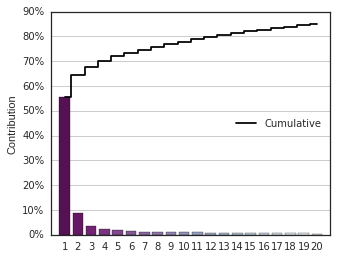

In [120]:
# Visualise
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

plt.figure(figsize=(5,4))
sns.barplot(x=np.arange(1,21),y=var_exp[:20],palette="BuPu_r")
#plt.bar(range(1,n+1),var_exp,alpha=0.5,align='center',color='red')
plt.step(np.arange(0,20),cumsum[:20],where='mid',color='black',label="Cumulative")
labels= plt.yticks()
new_labels = [str(int(label*100))+'%' for label in labels[0]]
plt.yticks(labels[0], new_labels)
plt.xlim(-1,20)
plt.ylim(0,0.9)
plt.ylabel('Contribution')
plt.grid(axis='y')
plt.legend(loc='right')
plt.savefig('PCA.pdf')

### PCA transformation matrix

In [13]:
Pca_w = np.real(eigen_vecs[:,0:20])
X_train_pca = X_train_std.dot(Pca_w)
X_test_pca = X_test_std.dot(Pca_w)

### Comparing to Scikit Learn PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_pca_2 = pca.fit_transform(X_train_std)
X_train_pca/X_train_pca_2

array([[ 1., -1.,  1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ...,  1., -1.,  1.],
       ..., 
       [ 1., -1.,  1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ...,  1., -1.,  1.]])

### Seting up Logistic Regressor

In [15]:
# Logistic regressor
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

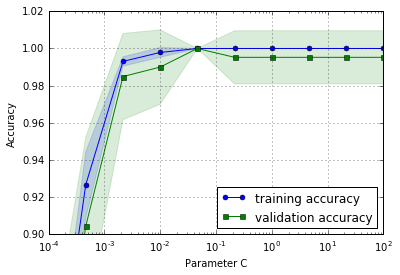

In [20]:
# validation curves: choosing penalty parameter C
from sklearn.learning_curve import validation_curve
param_range = np.logspace(-4,2,num=10)
train_scores, test_scores = validation_curve(estimator=clf,X=X_train_pca,y=y_train,param_name='C',
                                             param_range=param_range,cv=10)

train_mean = np.mean(train_scores,axis=1)
train_std  = np.std(train_scores,axis=1)
test_mean  = np.mean(test_scores,axis=1)
test_std   = np.std(test_scores,axis=1)

plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,color='blue',alpha=0.15)
plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,color='green',alpha=0.15)
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.9,1.02));

In [26]:
clf = LogisticRegression(C=0.05)
clf.fit(X_train_pca,y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Testing model on test data

In [27]:
from sklearn.metrics import accuracy_score
y_predict = clf.predict(X_test_pca)
print(accuracy_score(y_test,y_predict))

1.0
